DATA CLEANING: Clean up Foursquare column structure fot create a proper joined dataframe. 

In [18]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "data/four_square.csv"
four_square_df = pd.read_csv(file_path)

# Remove the specified columns
columns_to_remove = ['venue_id', 'venue_latitude', 'venue_longitude']
four_square_df.drop(columns=columns_to_remove, inplace=True)

# Rename 'venue_name' to 'business_name' and 'venue_category' to 'categories'
four_square_df.rename(columns={'venue_name': 'business_name', 'venue_category': 'categories'}, inplace=True)

# Add new columns 'review_count', 'rating', 'price', and 'phone' with None values
four_square_df.insert(four_square_df.columns.get_loc('business_name') + 1, 'review_count', None)
four_square_df.insert(four_square_df.columns.get_loc('review_count') + 1, 'rating', None)
four_square_df.insert(four_square_df.columns.get_loc('categories') + 1, 'price', None)
four_square_df.insert(four_square_df.columns.get_loc('price') + 1, 'phone', None)

# Move 'venue_distance' next to 'phone' and rename it to 'distance'
distance_column = four_square_df.pop('venue_distance')
four_square_df.insert(four_square_df.columns.get_loc('phone') + 1, 'distance', distance_column)

# Rename 'venue_address' to 'address' and move it to the end
address_column = four_square_df.pop('venue_address')
four_square_df['address'] = address_column

# Save the modified DataFrame to a new CSV file
modified_file_path = "data/four_square_modified.csv"
four_square_df.to_csv(modified_file_path, index=False)


# Display the first few rows of the modified DataFrame to confirm
four_square_df.head()


,station_name,latitude,longitude,business_name,review_count,rating,categories,price,phone,distance,address
0,10th & Cambie,49.262487,-123.114397,Winona Park,None,None,Landmarks and Outdoors,None,None,105,400 W 59th Ave
1,10th & Cambie,49.262487,-123.114397,Whole Foods,None,None,Retail,None,None,173,510 8th Ave W
2,10th & Cambie,49.262487,-123.114397,La Taqueria Pinche Taco Shop,None,None,Taco Restaurant,None,None,183,2450 Yukon St
3,10th & Cambie,49.262487,-123.114397,Elysian Coffee Broadway,None,None,Coffee Shop,None,None,216,590 Broadway W
4,10th & Cambie,49.262487,-123.114397,Rogue Kitchen & Wetbar,None,None,Bar,None,None,246,602W Broadway W


Now that both dataframes have the same column structure we can concatenate thwe two dataframes together and add in a Source column to identify where the data came from.

In [19]:


# Load the two CSV files into DataFrames
foursquare_path = "data/four_square_modified.csv"  # Replace with your actual file path
yelp_path = "data/yelp_businesses_near_bike_stations.csv"  # Replace with your actual file path

foursquare_df = pd.read_csv(foursquare_path)
yelp_df = pd.read_csv(yelp_path)

# Add the 'source' column to each DataFrame
foursquare_df['source'] = 'FourSquare'
yelp_df['source'] = 'Yelp'

# Merge/union the two DataFrames
merged_df = pd.concat([foursquare_df, yelp_df], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_file_path = "data/merged_restaurants.csv"  # Replace with your desired file path
merged_df.to_csv(merged_file_path, index=False)



# Display the first few rows of the merged DataFrame to confirm
merged_df.head()


,station_name,latitude,longitude,business_name,review_count,rating,categories,price,phone,distance,address,source
0,10th & Cambie,49.262487,-123.114397,Winona Park,NaN,NaN,Landmarks and Outdoors,NaN,NaN,105.0,400 W 59th Ave,FourSquare
1,10th & Cambie,49.262487,-123.114397,Whole Foods,NaN,NaN,Retail,NaN,NaN,173.0,510 8th Ave W,FourSquare
2,10th & Cambie,49.262487,-123.114397,La Taqueria Pinche Taco Shop,NaN,NaN,Taco Restaurant,NaN,NaN,183.0,2450 Yukon St,FourSquare
3,10th & Cambie,49.262487,-123.114397,Elysian Coffee Broadway,NaN,NaN,Coffee Shop,NaN,NaN,216.0,590 Broadway W,FourSquare
4,10th & Cambie,49.262487,-123.114397,Rogue Kitchen & Wetbar,NaN,NaN,Bar,NaN,NaN,246.0,602W Broadway W,FourSquare


Prepare the bike stattion data to be joined/merged with iur merged restaurant data

In [20]:
#Join the data from Part 1 with the data from Part 2 to create a new dataframe.
# Load the CSV file into a DataFrame
bike_stations_path = "data/Bike_stations.csv"
bike_stations_df = pd.read_csv(bike_stations_path)



# Rename 'name to station_name'
bike_stations_df.rename(columns={'name': 'station_name'}, inplace=True)

# Display the first few rows of the DataFrame to confirm
bike_stations_df.head()

,station_name,latitude,longitude,free_bikes,ebikes,empty_slots
0,10th & Cambie,49.262487,-123.114397,1,1,33
1,Yaletown-Roundhouse Station,49.274566,-123.121817,14,0,0
2,Dunsmuir & Beatty,49.279764,-123.110154,1,1,24
3,12th & Yukon (City Hall),49.260599,-123.113504,1,0,13
4,8th & Ash,49.264215,-123.117772,2,0,14


LEFT JOIN THE DATA SO WE KNOW HOW MANY BIKES ARE AVAILABLE IN SURROUNDING AREA of RESTAURANT

In [21]:
venues_bikes_df = pd.merge(bike_stations_df, merged_df, on=['station_name'], how='left')


# Print the head of the merged dataframe
print(venues_bikes_df.head())

    station_name  latitude_x  longitude_x  free_bikes  ebikes  empty_slots  \
0  10th & Cambie   49.262487  -123.114397           1       1           33   
1  10th & Cambie   49.262487  -123.114397           1       1           33   
2  10th & Cambie   49.262487  -123.114397           1       1           33   
3  10th & Cambie   49.262487  -123.114397           1       1           33   
4  10th & Cambie   49.262487  -123.114397           1       1           33   

   latitude_y  longitude_y                 business_name  review_count  \
0   49.262487  -123.114397                   Winona Park           NaN   
1   49.262487  -123.114397                   Whole Foods           NaN   
2   49.262487  -123.114397  La Taqueria Pinche Taco Shop           NaN   
3   49.262487  -123.114397       Elysian Coffee Broadway           NaN   
4   49.262487  -123.114397        Rogue Kitchen & Wetbar           NaN   

   rating              categories price  phone  distance          address  \
0     NaN

In [25]:
# Save the DataFrame to a CSV file locally
venues_bikes_df.to_csv('data/venues_bikes_df.csv', index=False)


EDA: Take a look at the distributions of review data

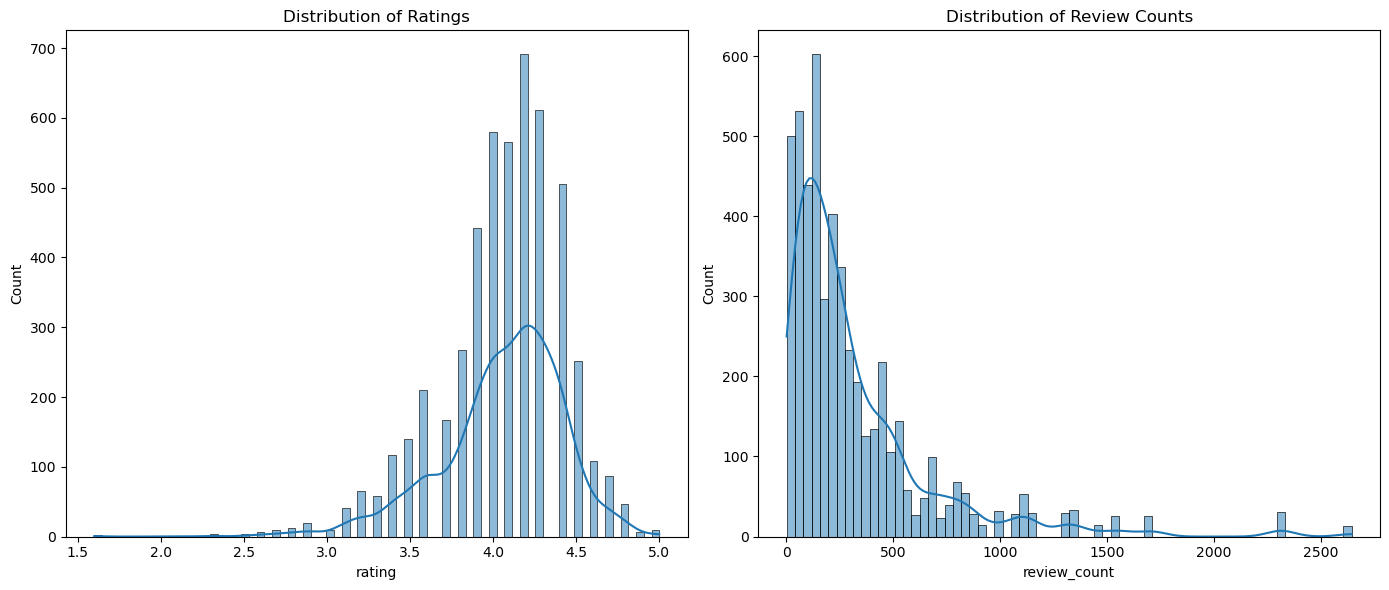

In [24]:
#Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship 
#you discoved through this visualization.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Filter out rows without review data (assuming review_count and rating are the columns)
venues_bikes_df = venues_bikes_df.dropna(subset=['review_count', 'rating'])

# Convert review_count and rating to numeric types if they are not already
venues_bikes_df['review_count'] = pd.to_numeric(venues_bikes_df['review_count'], errors='coerce')
venues_bikes_df['rating'] = pd.to_numeric(venues_bikes_df['rating'], errors='coerce')

# Plot histogram for ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(venues_bikes_df['rating'].dropna(), kde=True)
plt.title('Distribution of Ratings')

# Plot histogram for review count
plt.subplot(1, 2, 2)
sns.histplot(venues_bikes_df['review_count'].dropna(), kde=True)
plt.title('Distribution of Review Counts')

plt.tight_layout()
plt.show()



Put all relevant data inside and SQLite Databse File

In [23]:
#Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - 
#make sure to create your database in your project's data/ directory!)
import sqlite3
import pandas as pd
import os

# Define the paths to your CSV files and the folder for the database
bike_stations_path = "data/Bike_stations.csv"
merged_restaurants_path = "data/merged_restaurants.csv"
database_folder = "data"


# Path for the SQLite database inside the folder
database_path = os.path.join(database_folder, 'bikes_restaurants.db')

# Read the CSV files into DataFrames
bike_stations_df = pd.read_csv(bike_stations_path)
merged_restaurants_df = pd.read_csv(merged_restaurants_path)

# Connect to the SQLite3 database (or create it if it doesn't exist)
conn = sqlite3.connect(database_path)
c = conn.cursor()

# Create tables
c.execute('''
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id INTEGER PRIMARY KEY,
    station_name TEXT,
    station_latitude REAL,
    station_longitude REAL
)
''')

c.execute('''
CREATE TABLE IF NOT EXISTS restaurants (
    restaurant_id INTEGER PRIMARY KEY,
    business_name TEXT,
    review_count INTEGER,
    rating REAL,
    categories TEXT,
    price TEXT,
    phone TEXT,
    distance REAL,
    address TEXT,
    source TEXT,
    station_name TEXT,
    FOREIGN KEY (station_name) REFERENCES bike_stations (station_name)
)
''')

# Insert data into bike_stations table
bike_stations_df.to_sql('bike_stations', conn, if_exists='replace', index=False)

# Insert data into restaurants table
merged_restaurants_df.to_sql('restaurants', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Data has been successfully inserted into the SQLite3 database in the 'data' folder.")


Data has been successfully inserted into the SQLite3 database in the 'data' folder.
